In [1]:
# pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

In [4]:
import time

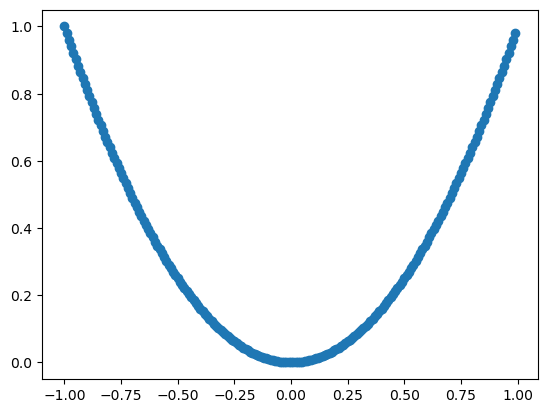

In [5]:
import numpy as np

x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)
     

In [6]:
def get_sin_data(start=0, end=10, step=0.1):
    x = np.arange(start,end,step)
    np.random.shuffle(x)
    y = np.sin(x)

    split_index = int(x.shape[0]*0.6)

    train_x, test_x = x[:split_index], x[split_index:]
    train_y, test_y = y[:split_index], y[split_index:]

    return (train_x, train_y), (test_x, test_y)

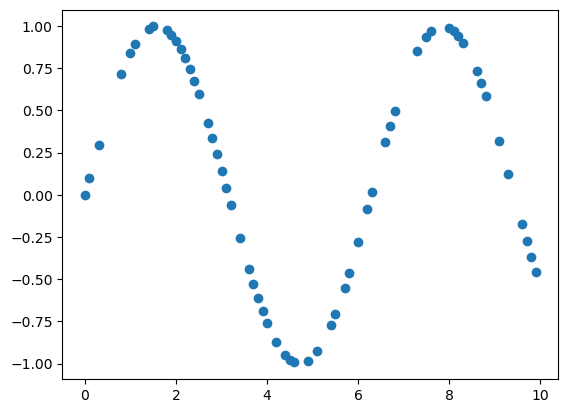

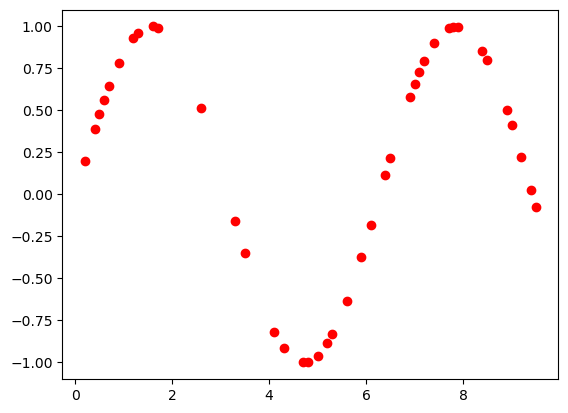

In [7]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x,train_y)
plt.show()

plt.scatter(test_x,test_y,color="r")
plt.show()

In [8]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):
    start_time = time.time()
    model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size,
              validation_data=(test_x, test_y))
    print("elapsed : {}".format(time.time() - start_time))    

    y_ = model.predict(test_x)

    plt.scatter(test_x,test_y)
    plt.scatter(test_x,y_,color='r')
    plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
    for i in range(n):
        print("{} times fitting".format(i))
        fit_one_more(model, train_x, train_y, test_x, test_y)


2023-02-09 14:20:32.209495: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-09 14:20:32.209881: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.132035970687866
40/1 [==================================================================================================================================================================================================================================================================================================================================================================

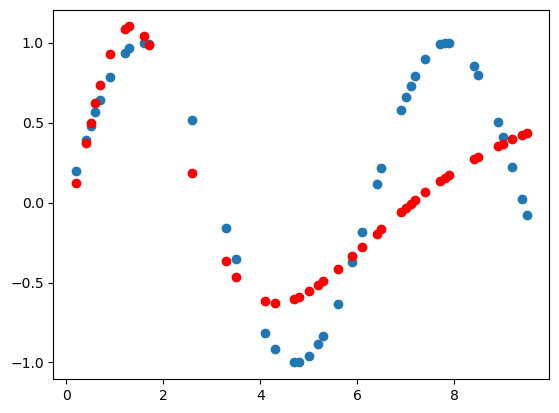

In [9]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

0 times fitting
elapsed : 19.212251901626587


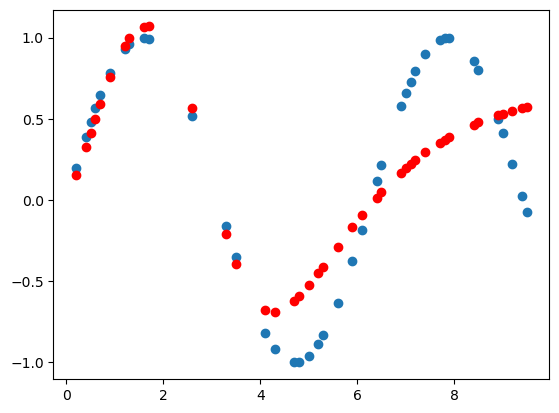

1 times fitting
elapsed : 18.68033790588379


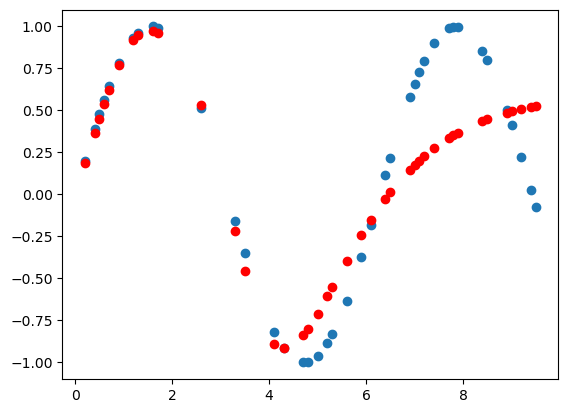

2 times fitting
elapsed : 19.119778871536255


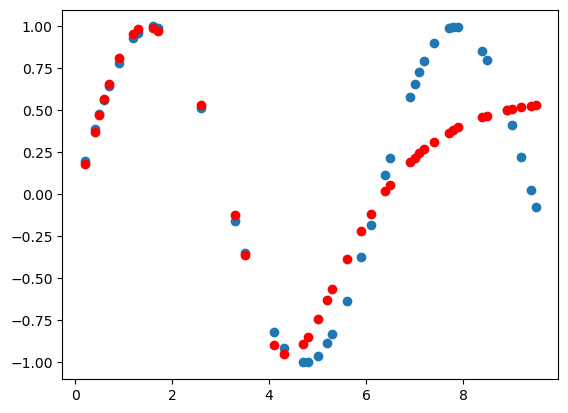

3 times fitting
elapsed : 18.987342834472656


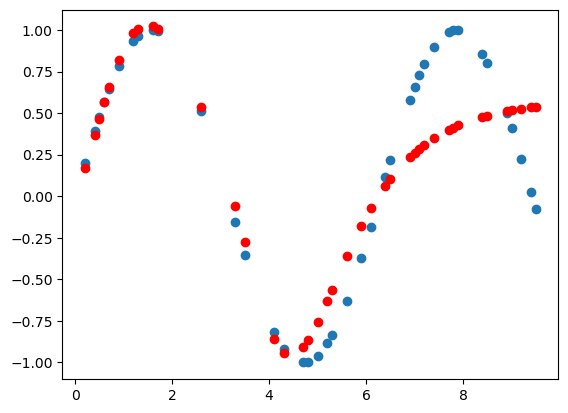

4 times fitting
elapsed : 19.29912304878235


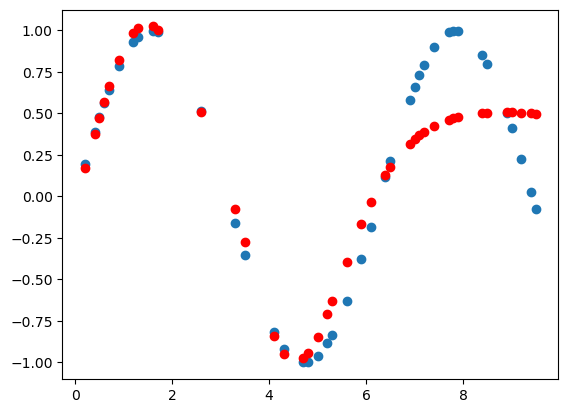

5 times fitting
elapsed : 18.768850803375244


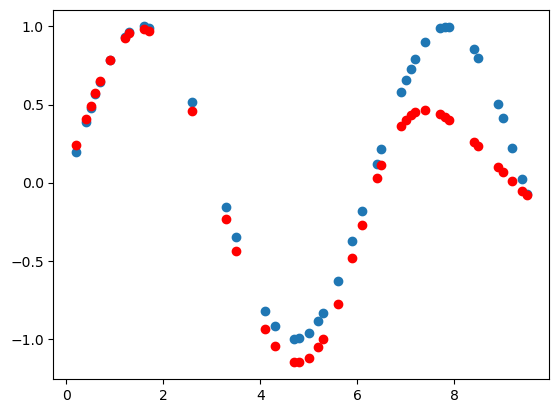

6 times fitting
elapsed : 18.675829887390137


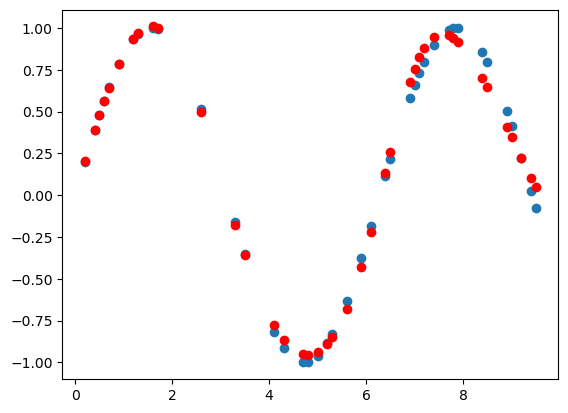

7 times fitting
elapsed : 18.64560890197754


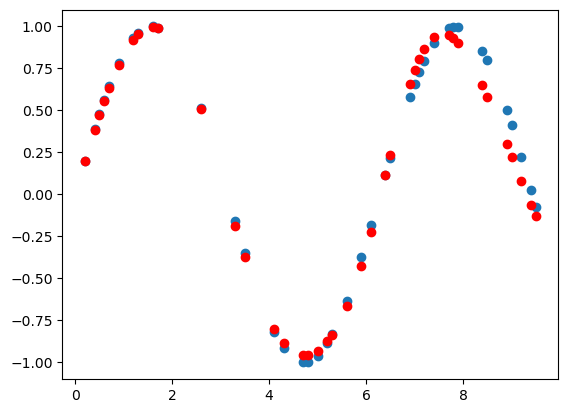

8 times fitting
elapsed : 18.645354986190796


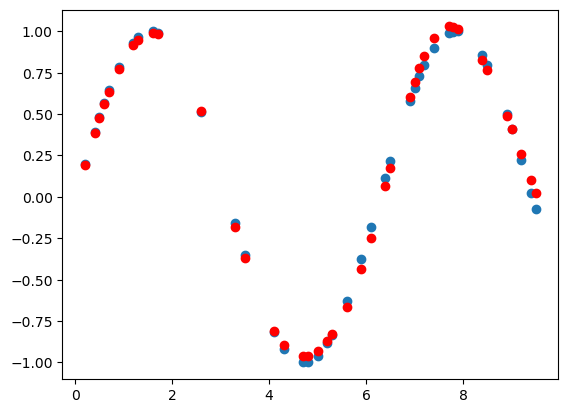

9 times fitting
elapsed : 18.634554862976074


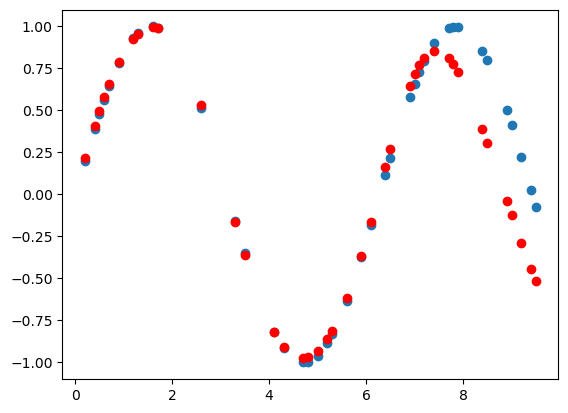

In [10]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

In [11]:
def build_model():
    model = keras.Sequential()
    model.add(Dense(10, activation='tanh', input_shape=(1,)))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(1))

    model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

    return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):
    for batch_size in batch_sizes:
        model = build_model()
        print("batch_size={}".format(batch_size))
        fit_one_more(model, train_x, train_y, test_x, test_y, batch_size)

In [12]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

batch_size=1


KeyboardInterrupt: 

In [ ]:
plt.plot(model.history.history['loss'])
plt.show()

In [ ]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
model.save('my_model.h5')

In [ ]:
new_model = keras.models.load_model('my_model.h5')

y_ = new_model.predict(test_x)

In [ ]:
optimizer = "SGD"
optimizer = SGD(learning_rate=0.01)

# 정리

In [ ]:
def get_sin_data(start=0, end=10, step=0.1):
    x = np.arange(start,end,step)
    np.random.shuffle(x)
    y = np.sin(x)

    split_index = int(x.shape[0]*0.6)

    train_x, test_x = x[:split_index], x[split_index:]
    train_y, test_y = y[:split_index], y[split_index:]

    return (train_x, train_y), (test_x, test_y)

In [ ]:
def build_model():
    model = keras.Sequential()
    model.add(Dense(10, activation='tanh', input_shape=(1,)))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(1))

    model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

    return model

In [ ]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):
    start_time = time.time()
    model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size, 
              validation_split=0.1)
    # model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size,
    #           validation_data=(test_x, test_y))
    print("elapsed : {}".format(time.time() - start_time))    

    y_ = model.predict(test_x)

    plt.scatter(test_x,test_y)
    plt.scatter(test_x,y_,color='r')
    plt.show()

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

In [ ]:
fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20)

In [ ]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()